In [13]:
import seaborn as sns
import spacy
import nltk
from nltk import bigrams
#from nltk.corpus import stopwords
import pandas as pd
import itertools
import collections
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from textblob import TextBlob
import numpy as np

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import pyLDAvis
import pyLDAvis.gensim  # don't skip this

/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
tweets = pd.read_pickle("/Users/tomashegewisch/research_project/Tomas/data/May.pkl")
#tweets = tweets.head(1000)

/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


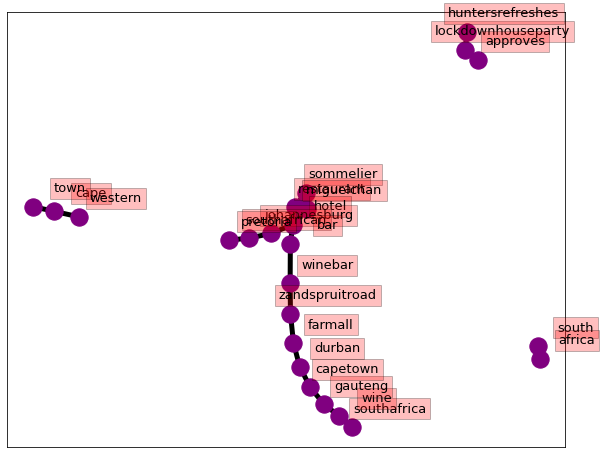

In [3]:
#https://www.earthdatascience.org
#/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-bigrams/
terms_bigram = [list(bigrams(t)) for t in tweets['tokenised']]
bigram = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigram)
# create a 
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

#G.add_node("China", weight=100)
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=7,
                 width=5,
                 edge_color='black',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

In [4]:
nlp = spacy.load("en_core_web_sm")

/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# def ner(text):
#     temp = ""
#     for i in text:
#         temp += i +" "
#     doc = nlp(temp)
#     return [X.label_ for X in doc.ents]

# ent = tweets['tokenised'].apply(lambda x : ner(x))
# ent = [x for sub in ent for x in sub]
# counter = Counter(ent)

# count = counter.most_common()
# x,y=map(list,zip(*count))
# sns.barplot(x=y,y=x)

/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
word_list = [] 
for i in tweets['tokenised']:
    for j in i:
        word_list.append(j)
word_list = pd.DataFrame(word_list)

/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def display(ents):
    def get_ner_per_tweet_tk(text,ent=ents):
        temp = ""
        for i in text:
            temp += i +" "
        doc = nlp(temp)
        return [X.text for X in doc.ents if X.label_ == ent]

    gpe = word_list.apply(lambda x: get_ner_per_tweet_tk(x))
    gpe = [x for x in gpe[0]]
    counter = Counter(gpe)
    x,y = map(list,zip(*counter.most_common(20)))
    sns.barplot(y,x)
    
#display("PERSON") 
display("GPE")
# we will need to fidn a new way to clean as this is not returning a usefull result 

/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


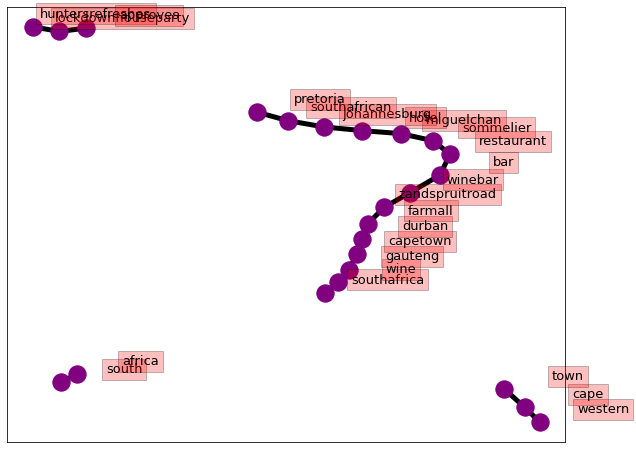

In [6]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

#G.add_node("china", weight=100)
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=7,
                 width=5,
                 edge_color='black',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

In [67]:
# Sentimnet
#https://www.machinelearningplus.com/time-series/time-series-analysis-python/
def get_sent(text):
    temp = ""
    for i in text:
        temp += i + " "
    return TextBlob(temp).sentiment.polarity

tweets['senti_values'] = tweets['tokenised'].apply(lambda x : get_sent(x))

/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [136]:
# get the important dates first.  
path = "/Users/tomashegewisch/research_project/Tomas/data/time_line.csv"
import csv
time_line = []
with open(path) as text_file:
    csv_reader = csv.reader(text_file, delimiter=';')
    for i in csv_reader:
        time_line.append(i)
#time_line[100]

# Encode the date
time_line = pd.DataFrame(time_line, columns=time_line.pop(0))
time_line["Date"].to_datetime()



/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AttributeError: 'Series' object has no attribute 'to_datetime'

/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='date', ylabel='senti_values'>

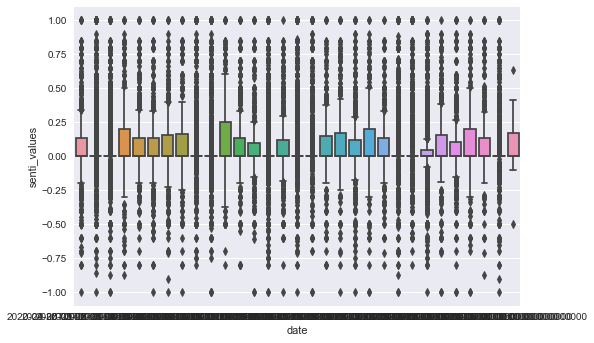

In [96]:
# Import data
# x = tweets['date'].values
# y1 = tweets['senti_values'].values
# plt.style.use('seaborn')


# plt.plot('date', 'senti_values', data=tweets, linestyle='', marker='o', markersize=0.7)
# plt.xlabel('Date')
# plt.ylabel('Sentiment Value')
# plt.title('Overplotting looks like that:', loc='left')
# Plot
# fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
# #plt.fill_between(x, y1=y1, alpha=0.5, linewidth=0.5, color='seagreen')
# #plt.plot(x, y1, '.')
# plt.ylim(-1.0, 1.0)
# plt.title('Sentiment overtime', fontsize=16)
# #plt.hlines(y=0, xmin=np.min(tweets.date), xmax=np.max(tweets.date), linewidth=.5)
# plt.show()

sns.boxplot(x='date', y='senti_values', data=tweets)


/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


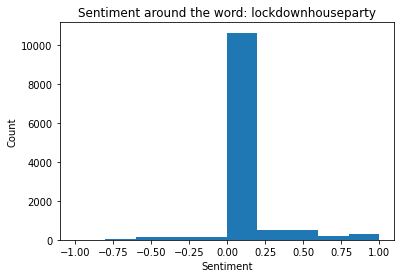

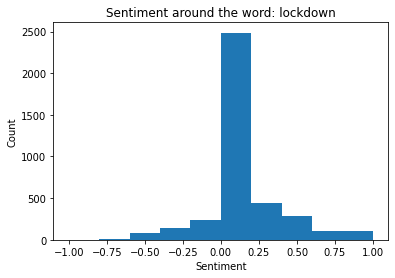

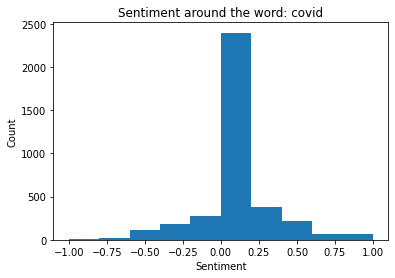

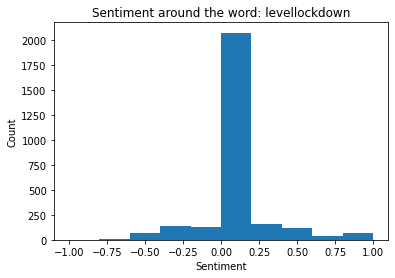

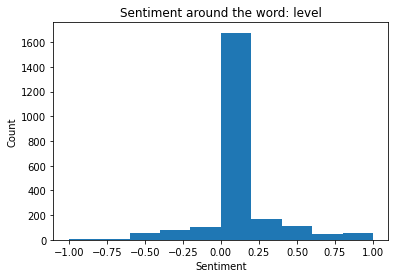

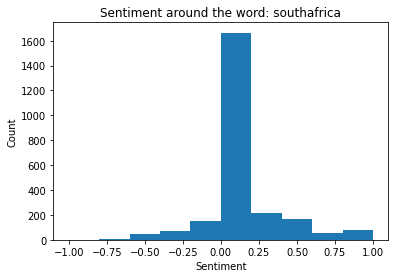

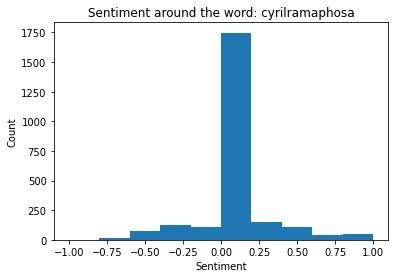

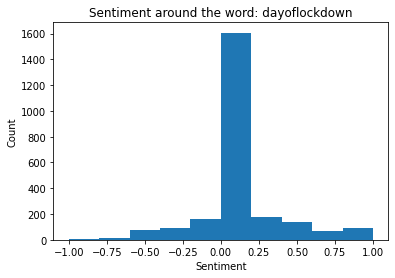

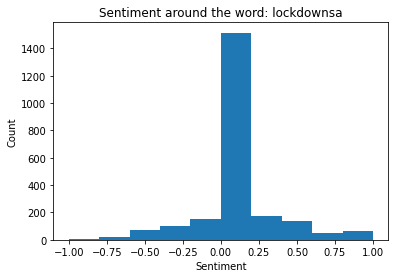

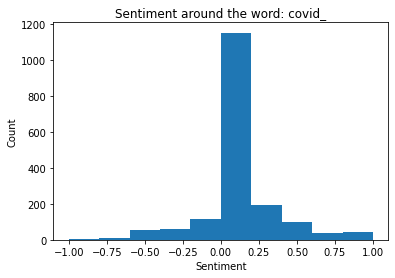

In [21]:
word_list_counter = Counter(word_list[0])
def get_sent_for_top_words(text, lookout_word):
    text_string = ""
    if lookout_word not in text:
        return None
    else:
        for i in text:
            text_string += i + " "
        return TextBlob(text_string).sentiment.polarity

for i in word_list_counter.most_common(10):
    path_name = 'charts/'+i[0]+'.png'
    tweet_senti_values = tweets['tokenised'].apply(lambda x : get_sent_for_top_words(x, i[0]))
    tweet_senti_values = tweet_senti_values.dropna(axis=0, inplace=False, how=None)
    #tweet_senti_values.hist()
    plt.hist(tweet_senti_values)
    plt.title('Sentiment around the word: ' + i[0])
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

In [ ]:
# pair wise collroation


/Users/tomashegewisch/research_project/Tomas/env/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


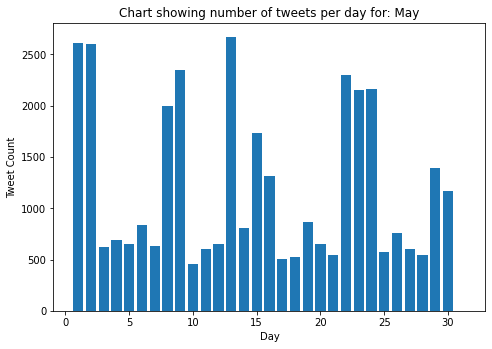

In [9]:
# Time line

# temp = ""
# for i in range(1,32):
#     temp+=str(i) + ":0,"
# temp

date_dict = {1:0,2:0,3:0,4:0,
             5:0,6:0,7:0,8:0,9:0,
             10:0,11:0,12:0,13:0,
             14:0,15:0,16:0,17:0,18:0,
             19:0,20:0,21:0,22:0,23:0,
             24:0,25:0,26:0,27:0,28:0,
             29:0,30:0,31:0}

for i in tweets["date"]:
    value = int(i.to_pydatetime().strftime("%d"))
    date_dict[value] = date_dict[value]+1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(list(date_dict.keys()),list(date_dict.values()))
ax.set_ylabel('Tweet Count')
ax.set_xlabel('Day')
ax.set_title('Chart showing number of tweets per day for: May')
plt.show()

In [ ]:
# date_dict
# #tfidf.vocabulary_

# from yellowbrick.text import TSNEVisualizer
# from matplotlib.axes._axes import _log as matplotlib_axes_logger

# matplotlib_axes_logger.setLevel('ERROR')

# corpus = word_list[0][0:60]
# tfidf = TfidfVectorizer()

# X = tfidf.fit_transform(corpus)
# y = corpus

# # Create the visualizer and draw the vectors
# tsne = TSNEVisualizer()
# tsne.fit(X, y)
# tsne.show()

In [ ]:
# we have put this on hold.. Not sure what this is good for.
# def dummy_fun(doc):
#     return doc

# tfidf = TfidfVectorizer(
#     analyzer='word',
#     tokenizer=dummy_fun,
#     preprocessor=dummy_fun,
#     token_pattern=None) 

# tfidf.fit([word_list[0]])

# from scipy import stats
# from numpy import array

# data = tfidf

# density = stats.kde.gaussian_kde(data)

# x = np.arange(0, 8, 0.1)

# plt.scatter(x, density(x))

In [ ]:
# dude

In [ ]:
#TOPIC Modelling

# Create Dictionary
id2word = corpora.Dictionary(tweets['tokenised'])

# Create Corpus
texts = tweets['tokenised']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis